In [1]:
from pomegranate import*

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde

In [2]:
from hmm_helpers import build_hmm

In [17]:
sns.set(color_codes=True)

In [3]:
sample = "sample_2"
ffile = "results/1_5_2020/"
hmm_file = ffile + sample + "/" + "Original_HMM_Model.json"

In [27]:
# this is the model we trained
hmm = build_hmm(hmm_file)

# make sure that no updsates occur
hmm.freeze()

Orphan state HMM_Model-start removed due to no edges                             leading to it
Orphan state HMM_Model-end removed due to no edges                             leading to it


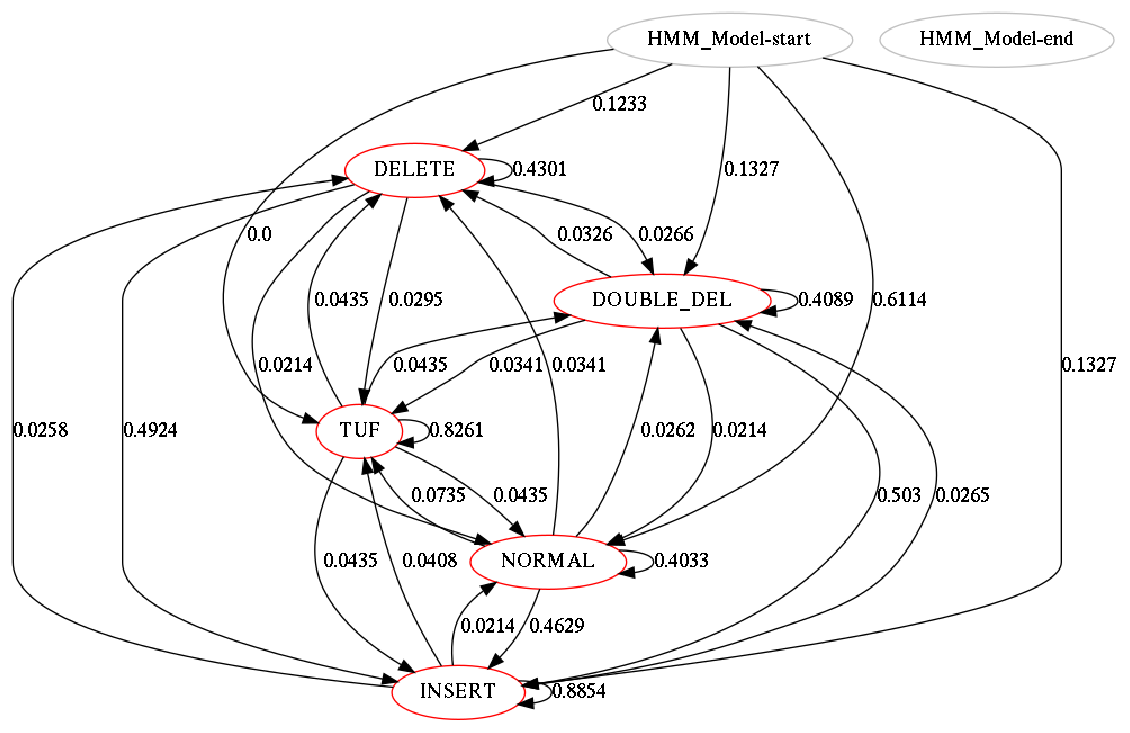

In [28]:
# visualize the model we just trained
plt.figure( figsize=(20,18) )
hmm.plot()
plt.show()

In [10]:
# load the non wga means
no_wga_wmeans =[]
with open(ffile + sample + "/no_wga_windows_mean.txt") as file:
    context = file.read()
    size = len(context)
    arraystr= context[1:size-1]
    arraystr = arraystr.split(',')
    no_wga_wmeans = [float(item) for item in arraystr]

In [11]:
# load the wga means
wga_wmeans =[]
with open(ffile +sample + "/wga_windows_mean.txt") as file:
    context = file.read()
    size = len(context)
    arraystr= context[1:size-1]
    arraystr = arraystr.split(',')
    wga_wmeans = [float(item) for item in arraystr]

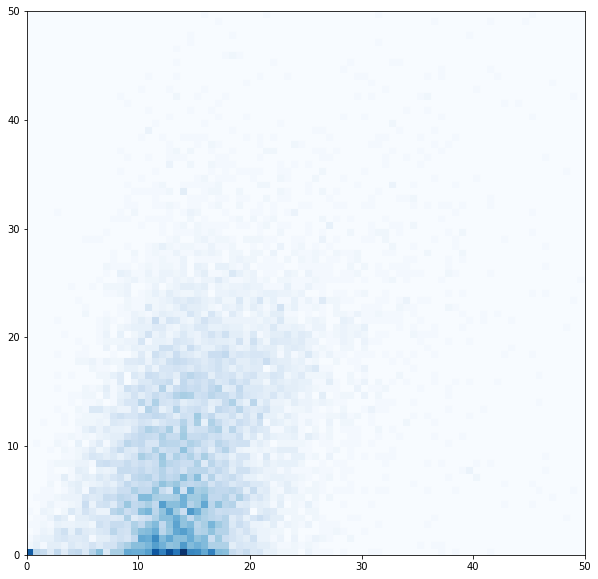

In [15]:
# visualize two 
nbins = 80
min_ = 0.0
max_ = 50.0

plt.figure( figsize=(10,10) )
plt.hist2d(no_wga_wmeans, wga_wmeans,
                 bins=[nbins, nbins], cmap='Blues', density=False,
                 cmax=1000,
                 cmin=0,
                 alpha=0.99,
                 range=((min_, max_), (min_, max_)))
plt.title = "Hist 2D"
plt.show()

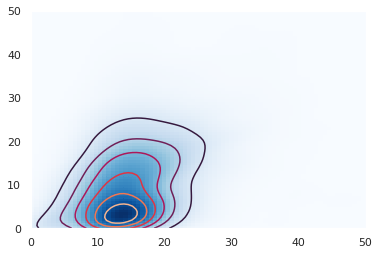

In [20]:
# Evaluate a gaussian kde on a
# regular grid of nbins x nbins over data extents
kernel= kde.gaussian_kde(np.vstack([no_wga_wmeans, wga_wmeans]))
xi, yi = np.mgrid[min_:max_:nbins*1j,
                    min_:max_:nbins*1j]
zi = kernel(np.vstack([xi.flatten(), yi.flatten()]))
plt.title='Gaussian KDE'
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues') #plt.cm.BuGn_r)
plt.contour(xi, yi, zi.reshape(xi.shape) )
plt.show()

In [23]:
# Viterbi path
# create a sequence of window means
sequence=[]
for mu1, mu2 in zip(wga_wmeans, no_wga_wmeans):
    sequence.append((mu1,mu2))

viterbi_path=hmm.viterbi(sequence=sequence)


In [24]:
print(viterbi_path)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [26]:
p_d_given_m = hmm.log_probability(sequence=sequence)
print("P(D|M): ", p_d_given_m)
print(hmm.predict_proba(sequence))

P(D|M):  -102135.87356154068
[[1.00000001e+000 2.91372330e-234 1.48792681e-038 1.99025264e-015
  0.00000000e+000]
 [5.36486245e-010 8.37189441e-244 2.10699522e-050 1.02419712e-027
  1.00000001e+000]
 [2.97463391e-005 9.60463965e-246 4.43996414e-053 1.26107457e-022
  9.99970261e-001]
 ...
 [9.01818538e-007 1.14768147e-244 5.94950044e-001 4.05049054e-001
  1.17747399e-010]
 [1.72634640e-006 1.22335224e-244 6.77484180e-001 3.22514094e-001
  1.20395894e-010]
 [1.09770085e-006 2.13052072e-244 7.67465337e-001 2.32533565e-001
  1.59094283e-010]]


In [29]:
predictions = hmm.predict(sequence=sequence, algorithm="viterbi")

In [30]:
print(predictions)

[5, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 0, 2, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 0, 4, 4, 4, 4, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 